# Binary Classification: Let's break it down!

1. Visualize
2. Preprocess
3. Created a model
4. Fit the model
5. Evaluate
6. Tweak different parameters
7. repeat

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import pathlib
import os

### 1.Visualize

In [2]:
data_dir = pathlib.Path("pizza_steak\\train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['pizza' 'steak']


In [3]:
def view_random_image(target_dir, target_class):
    #setup target dir
    
    class_list = os.listdir(target_dir)
    random_class = np.random.randint(0, len(class_list))
    
    target_folder = os.path.join(target_dir, target_class[random_class])
    #target_folder = target_dir+target_class 
    image_list = os.listdir(target_folder)
    random_index = np.random.randint(0, len(image_list))
    
    rand_image = os.path.join(target_folder,image_list[random_index])
    
    img = mpimg.imread(rand_image)
    plt.imshow(img)
    plt.title(target_class[random_class])
    plt.axis('off');
    
    print(f"Image shape: {img.shape}")
    
    return img

Image shape: (512, 512, 3)
Image shape: (512, 506, 3)
Image shape: (384, 512, 3)
Image shape: (512, 512, 3)


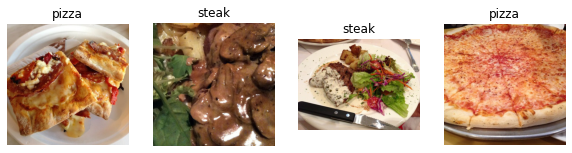

In [4]:
plt.figure(figsize=(10,7))
plt.subplot(1,4,1)
img_1 =view_random_image(data_dir, class_names)
plt.subplot(1,4,2)
img_2 =view_random_image(data_dir, class_names)
plt.subplot(1,4,3)
img_3 =view_random_image(data_dir, class_names)
plt.subplot(1,4,4)
img_4 =view_random_image(data_dir, class_names)

image shapes in the source have different sizes

### 2. Preprocess

In [5]:
train_dir = "pizza_steak\\train\\"
test_dir ="pizza_steak\\test\\"

create **batches** , smaller subsets ( typically 32) samples a time 

In [6]:
# Create train and test data generators and rescale the data

from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)


In [7]:
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test" 

train_data = train_datagen.flow_from_directory(directory=train_dir,
                               batch_size=32,
                               target_size=(224,224), # resizes all images to similar size
                               class_mode='binary',
                               seed=42)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                               batch_size=32,
                               target_size=(224,224),
                               class_mode='binary',
                               seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [8]:
# get a sample of a train data batch

images, labels = train_data.next()
len(images), len(labels)

(32, 32)

In [9]:
# how many batches?

len(train_data) # 1500/32

47

In [10]:
# get the first two images

images[:2], images[0].shape

(array([[[[0.42352945, 0.43137258, 0.34509805],
          [0.31764707, 0.3254902 , 0.2392157 ],
          [0.26666668, 0.28235295, 0.18431373],
          ...,
          [0.42352945, 0.34901962, 0.37254903],
          [0.427451  , 0.34901962, 0.39607847],
          [0.45098042, 0.36862746, 0.427451  ]],
 
         [[0.2901961 , 0.30588236, 0.21568629],
          [0.45882356, 0.47450984, 0.37647063],
          [0.2627451 , 0.28627452, 0.18431373],
          ...,
          [0.39607847, 0.34117648, 0.34117648],
          [0.4156863 , 0.36862746, 0.37647063],
          [0.39607847, 0.34901962, 0.3647059 ]],
 
         [[0.37254903, 0.39607847, 0.29411766],
          [0.39607847, 0.41960788, 0.31764707],
          [0.30588236, 0.34117648, 0.23529413],
          ...,
          [0.34509805, 0.3254902 , 0.3019608 ],
          [0.30980393, 0.29803923, 0.27058825],
          [0.3372549 , 0.3254902 , 0.30588236]],
 
         ...,
 
         [[0.5137255 , 0.5019608 , 0.54509807],
          [0.52156

In [11]:
# view the first batch of labels
labels

array([1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1.,
       0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0.],
      dtype=float32)

### 3.Create a CNN model (start with a baseline)

A baseline is a relatively simple model (or existing result) that you setup when beginning a machine learning experiment. In further experimenting cycles the goal is to beat the baseline model

In [12]:
# saving some keystrokes while builing the model ...

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential


In [13]:
#create the baseline model ( a 3layer CNN)

model_04 = Sequential([
    Conv2D(filters=10, # filter is the number of sliding windows (somewhat like the number of units in a layer)
          kernel_size=3, # each sliding window has its own kernel and hence its own weights to train. 3 specifies the size of the kernel (3 = 3x3 pixels, (3,2) would be 3x2 pixels)
          strides=1, # the distance in pixels the kernel moves across the sliding window ( can input  tuple (2,1) for ex)
          padding="valid", # if 'same' input and output have the same shape; if set to valid the output gets compressed
          activation="relu",
          input_shape=(224,224,3)), # input_layer
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    Flatten(),
    Dense(1, activation='sigmoid') #outputlayer
])



In [14]:
model_04.compile(loss ='binary_crossentropy',
                optimizer=Adam(),
                metrics='accuracy')

In [15]:
model_04.summary() #  shape decrease (input(224) -> 222 -> 220 -> 218) is due to padding set to "valid"

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 218, 218, 10)      910       
_________________________________________________________________
flatten (Flatten)            (None, 475240)            0         
_________________________________________________________________
dense (Dense)                (None, 1)                 475241    
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


### 4. Fit the model

In [16]:
# check the length of test and training data generators
len(train_data), len(test_data)


(47, 16)

In [18]:
# history_04 = model_04.fit(train_data,
#                          epochs=5,
#                          steps_per_epoch = len(train_data), #all 47 batches put through the CNN
#                          validation_data=test_data,
#                          validation_steps=len(test_data))

Comparing to model_01 (in A5-1) this model performs worse despite having about 15times as much trainable parameters

### 5. Evaluating

let's evaluate the classification with different metrics

<AxesSubplot:>

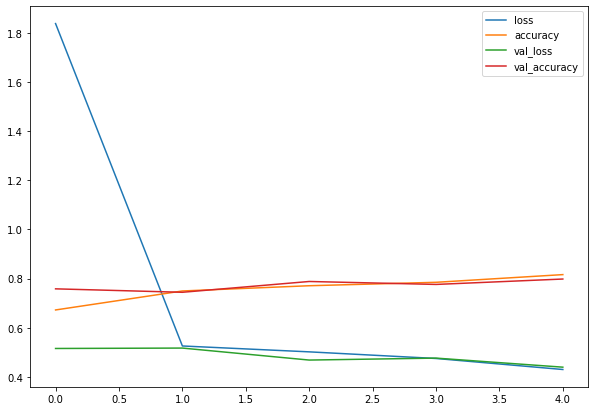

In [20]:
pd.DataFrame(history_04.history).plot(figsize=(10,7))

In [19]:
#plot the validation and traing curves separately

def plot_loss_curves(history):
    """
    Returns separate loss curves for training and validation metrics
    """
    
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    
    epochs = range(0,len(history.history['loss']))
    
    plt.figure()
    plt.plot(epochs, loss, label='training_loss')
    plt.plot(epochs, val_loss, label='validation_loss')
    plt.title('loss')
    plt.xlabel('epochs')
    plt.legend()
    
    plt.figure()
    plt.plot(epochs, accuracy, label='training_accuracy')
    plt.plot(epochs, val_accuracy, label='validation_accuracy')
    plt.title('accuracy')
    plt.xlabel('epochs')
    plt.legend()

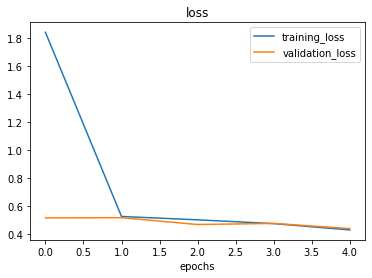

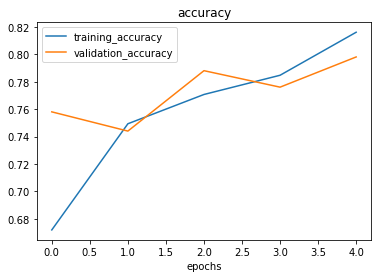

In [27]:
plot_loss_curves(history_04)

**validation_loss doesn't decrease**, it's likely that the model is **overfitting** the training data set. This leads to the inability to generalize patterns in the training data  <br>
Ideally the both curves (training and validation) should follow a similar trace

### 6. Adjust the model parameters

Fitting a ML-model comes in 3 steps:

0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

Ways to induce overfitting:
* Increase the numbers of conv layers
* Increase the numbers of conv filters
* Add another dense layer to the output of out flattened layer

Reduce overfitting:
* Add data augmentation
* Add regularization layers (such as MaxPool2d)
* Add more data ...

**reducing overfitting** is also known as **regularization** 

In [39]:
#Create the model (this is going to be the new baseline)

model_05 = Sequential([
    Conv2D(10,3, activation='relu', input_shape=(224,224,3)),
    MaxPool2D(pool_size=2), # from a 2x2 kernel the max value is returned, this reduces the output shape by 50% ( input_layer(224,224,3)-> (222,222,3) -> (111,111,3))
    Conv2D(10,3),
    MaxPool2D(),
    Conv2D(10,3),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation='sigmoid')
])

In [40]:
model_05.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 52, 52, 10)        910       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 26, 26, 10)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 6760)             

By adding a pooling layer after each convolutional layer the numbers of trainable parameters is reduced significantly ( from 477K to ~9K)

In [41]:
model_05.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics='accuracy')

In [42]:
# history_05 = model_05.fit(train_data,
#                          epochs=5,
#                          steps_per_epoch=len(train_data),
#                          validation_data=test_data,
#                          validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 13s 280ms/step - loss: 0.5964 - accuracy: 0.6640 - val_loss: 0.4737 - val_accuracy: 0.7680
Epoch 2/5
47/47 [==============================] - 13s 278ms/step - loss: 0.4988 - accuracy: 0.7640 - val_loss: 0.4740 - val_accuracy: 0.7560
Epoch 3/5
47/47 [==============================] - 13s 280ms/step - loss: 0.4501 - accuracy: 0.8060 - val_loss: 0.4134 - val_accuracy: 0.8160
Epoch 4/5
47/47 [==============================] - 13s 285ms/step - loss: 0.4195 - accuracy: 0.8107 - val_loss: 0.3816 - val_accuracy: 0.8400
Epoch 5/5
47/47 [==============================] - 14s 289ms/step - loss: 0.3987 - accuracy: 0.8180 - val_loss: 0.3782 - val_accuracy: 0.8220


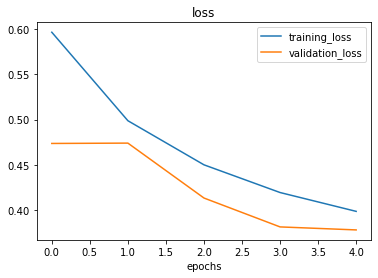

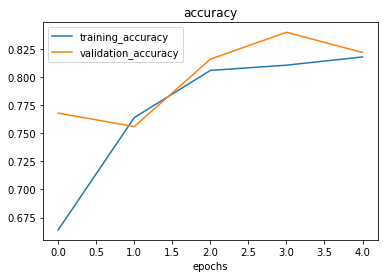

In [43]:
plot_loss_curves(history_05)

### Data augmentation

In [20]:
# Create ImageDataGenerator training with data augmentation

train_datagen_augmented = ImageDataGenerator(rescale=1/225.,
                                            rotation_range=0.2,
                                            shear_range=0.2,
                                            zoom_range=0.2,
                                            width_shift_range=0.2,
                                            height_shift_range=0.2,
                                            horizontal_flip=True)

# Create ImageDataGenerator training without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator training without data augmentation for test data
test_datagen = ImageDataGenerator(rescale=1/255.)

data augmentation is the process of altering our **training data**, leading to more diversity and in turn allowing our models to learn generalizable patterns. 
Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar

In [21]:
# Import data and augment it from training directory
print('Augmented training data:')
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224,224),
                                                                  batch_size=32,
                                                                  class_mode='binary',
                                                                  shuffle=False) #for demonstration only
#create non-augmented training data
print('Non-augmented training data:')
train_data = train_datagen.flow_from_directory(train_dir, 
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode='binary',
                                              shuffle=False)

#create non-augmented training data
print('Non-augmented test data:')
test_data = test_datagen.flow_from_directory(test_dir, 
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode='binary')



Augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented test data:
Found 500 images belonging to 2 classes.


* **Data augmentation** is usually only performed on the training data
* **Using ImageDataGenerator** built-in data augmentation parameters our images are left as they are in the directories but are modified as they're loaded into the model

In [22]:
# get sample data batches
images, labels = train_data.next()
aug_images, aug_labels = train_data_augmented.next() # note: labels don't get augmented only features

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


showing image number: 3


(-0.5, 223.5, 223.5, -0.5)

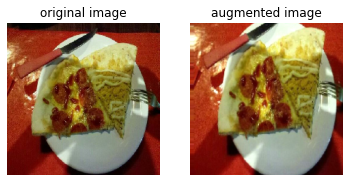

In [23]:
#Show the original image and the augmented image

import random
random_number = random.randint(0,31)

print(f"showing image number: {random_number}")
plt.subplot(1,2,1)
plt.imshow(images[random_number])
plt.title(f'original image')
plt.axis(False)

plt.subplot(1,2,2)
plt.imshow(aug_images[random_number])
plt.title(f'augmented image')
plt.axis(False)

In [24]:
# training on augmented training data ; same as model_05

model_06 = Sequential([
    Conv2D(10,3,activation='relu', input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(1, activation='sigmoid')
])


model_06.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics='accuracy')

# history_06 = model_06.fit(train_data_augmented,
#                         epochs=5,
#                         steps_per_epoch=len(train_data_augmented),
#                         validation_data=test_data,
#                         validation_steps=len(test_data))

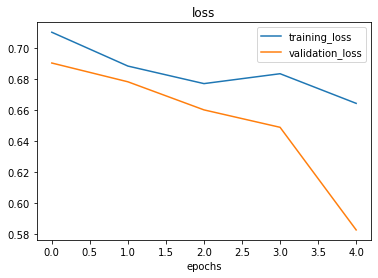

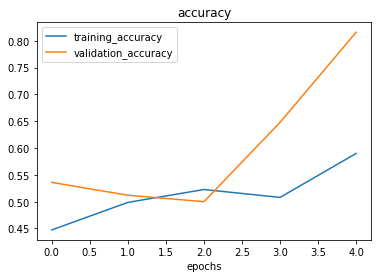

In [83]:
plot_loss_curves(history_06)

Recreate the model with **shuffled data**

In [25]:
# Import data and augment it from training directory
print('Augmented training data:')
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224,224),
                                                                  batch_size=32,
                                                                  class_mode='binary',
                                                                  shuffle=True) 
#create non-augmented training data
print('Non-augmented training data:')
train_data = train_datagen.flow_from_directory(train_dir, 
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode='binary',
                                              shuffle=True)

#create non-augmented training data
print('Non-augmented test data:')
test_data = test_datagen.flow_from_directory(test_dir, 
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode='binary')


Augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented test data:
Found 500 images belonging to 2 classes.


In [85]:
# training on augmented training data ; same as model_05

model_07 = Sequential([
    Conv2D(10,3,activation='relu', input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(1, activation='sigmoid')
])


model_07.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics='accuracy')

# history_07 = model_07.fit(train_data_augmented,
#                         epochs=5,
#                         steps_per_epoch=len(train_data_augmented),
#                         validation_data=test_data,
#                         validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 25s 521ms/step - loss: 0.6693 - accuracy: 0.5633 - val_loss: 0.6047 - val_accuracy: 0.6380
Epoch 2/5
47/47 [==============================] - 25s 527ms/step - loss: 0.5686 - accuracy: 0.7060 - val_loss: 0.6993 - val_accuracy: 0.5800
Epoch 3/5
47/47 [==============================] - 25s 528ms/step - loss: 0.5336 - accuracy: 0.7327 - val_loss: 0.4409 - val_accuracy: 0.8000
Epoch 4/5
47/47 [==============================] - 25s 537ms/step - loss: 0.4938 - accuracy: 0.7733 - val_loss: 0.4176 - val_accuracy: 0.8100
Epoch 5/5
47/47 [==============================] - 25s 542ms/step - loss: 0.4771 - accuracy: 0.7827 - val_loss: 0.3565 - val_accuracy: 0.8460


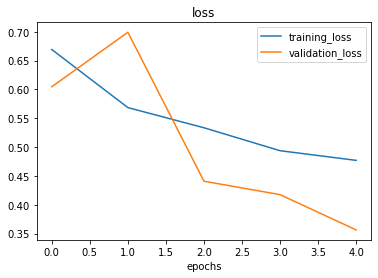

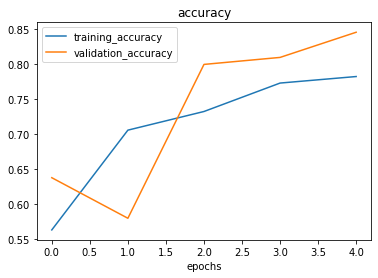

In [86]:
plot_loss_curves(history_07)

without shuffling the training data comes in sequentially. at first 750 images of pizza and then 750 images of steaks. This makes it quite hard for the model to fit the data

### 7. Repeat tweaking until satisfied

Since we'va already beaten our baseline, there are a few things we could try to further improve the model:
* Increase the number of model layers(e.g. add more 'Conv2D' and 'MaxPool2D')
* Increase the number of filters (from 10 to 32 or more)
* Train for longer (more epochs)
* Finding an ideal learning rate
* Get more data


In [87]:
# recreating model_01 and train it on augmented data

model_08 = Sequential([
    Conv2D(10,3,activation='relu', input_shape=(224,224,3)),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation='sigmoid')           
])

model_08.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics='accuracy')

# history_08 = model_08.fit(train_data_augmented,
#                          epochs=5,
#                          steps_per_epoch=len(train_data_augmented),
#                          validation_data=test_data,
#                          validation_steps=len(test_data))


Epoch 1/5
47/47 [==============================] - 32s 673ms/step - loss: 0.6844 - accuracy: 0.5820 - val_loss: 0.5364 - val_accuracy: 0.7800
Epoch 2/5
47/47 [==============================] - 31s 664ms/step - loss: 0.5452 - accuracy: 0.7460 - val_loss: 0.4096 - val_accuracy: 0.8380
Epoch 3/5
47/47 [==============================] - 32s 689ms/step - loss: 0.4931 - accuracy: 0.7740 - val_loss: 0.3814 - val_accuracy: 0.8480
Epoch 4/5
47/47 [==============================] - 33s 703ms/step - loss: 0.4820 - accuracy: 0.7820 - val_loss: 0.4086 - val_accuracy: 0.8240
Epoch 5/5
47/47 [==============================] - 33s 712ms/step - loss: 0.4646 - accuracy: 0.7907 - val_loss: 0.3680 - val_accuracy: 0.8580


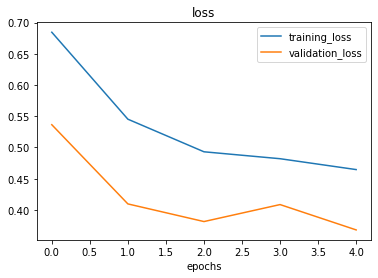

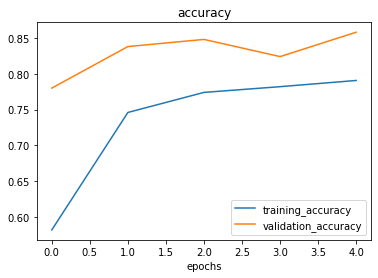

In [88]:
plot_loss_curves(history_08)

In [91]:
model_08.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 53, 53, 10)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 28090)            

In [92]:
# going big ...
model_09 = Sequential([
    Conv2D(32,3,activation='relu', input_shape=(224,224,3)),
    Conv2D(32,3,activation='relu'),
    MaxPool2D(),
    Conv2D(32,3,activation='relu'),
    Conv2D(32,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation='sigmoid')           
])

model_09.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics='accuracy')

# history_09 = model_09.fit(train_data_augmented,
#                          epochs=10,
#                          steps_per_epoch=len(train_data_augmented),
#                          validation_data=test_data,
#                          validation_steps=len(test_data))

Epoch 1/10
47/47 [==============================] - 64s 1s/step - loss: 0.6062 - accuracy: 0.6547 - val_loss: 0.6795 - val_accuracy: 0.5720
Epoch 2/10
47/47 [==============================] - 67s 1s/step - loss: 0.5184 - accuracy: 0.7500 - val_loss: 0.3450 - val_accuracy: 0.8360
Epoch 3/10
47/47 [==============================] - 69s 1s/step - loss: 0.5105 - accuracy: 0.7407 - val_loss: 0.4191 - val_accuracy: 0.8640
Epoch 4/10
47/47 [==============================] - 71s 2s/step - loss: 0.4865 - accuracy: 0.7660 - val_loss: 0.3481 - val_accuracy: 0.8420
Epoch 5/10
47/47 [==============================] - 72s 2s/step - loss: 0.4393 - accuracy: 0.8040 - val_loss: 0.3421 - val_accuracy: 0.8660
Epoch 6/10
47/47 [==============================] - 72s 2s/step - loss: 0.4691 - accuracy: 0.7933 - val_loss: 0.4592 - val_accuracy: 0.7640
Epoch 7/10
47/47 [==============================] - 71s 2s/step - loss: 0.4584 - accuracy: 0.7880 - val_loss: 0.3766 - val_accuracy: 0.8280
Epoch 8/10
47/47 [==

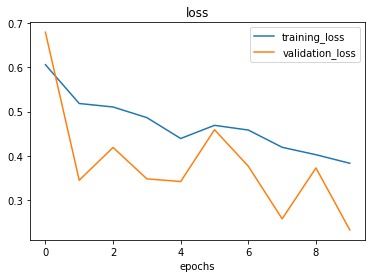

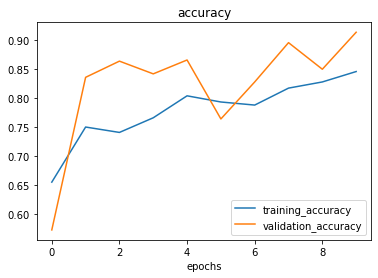

In [93]:
plot_loss_curves(history_09)

In [94]:
path = 'C:\\Users\\neema\\Notebooks\\Udemy_TensorFlow'
path = path +  '\pizza_steak_predover90perc.h5'
model_09.save(path)

In [95]:
model_09.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 220, 220, 32)      9248      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 110, 110, 32)      0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 108, 108, 32)      9248      
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 106, 106, 32)      9248      
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 53, 53, 32)        0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 89888)           

In [26]:
model_09 = tf.keras.models.load_model('pizza_steak_predover90perc.h5')

In [27]:
## Making a prediction on our own data

In [28]:
print(class_names)

['pizza' 'steak']


In [61]:
import matplotlib.image as mpimg
#%load 'https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg'
path = 'https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg'
steak = mpimg.imread(path, format="jpeg")
type(steak)

C:\Users\neema\AppData\Local\Temp/ipykernel_7680/387508921.py:4: MatplotlibDeprecationWarning: Directly reading images from URLs is deprecated since 3.4 and will no longer be supported two minor releases later. Please open the URL for reading and pass the result to Pillow, e.g. with ``np.array(PIL.Image.open(urllib.request.urlopen(url)))``.
  steak = mpimg.imread(path, format="jpeg")


numpy.ndarray

(-0.5, 3023.5, 4031.5, -0.5)

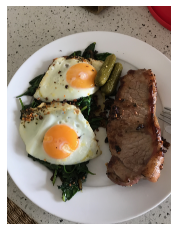

In [48]:
plt.imshow(steak)
plt.axis(False)

In [49]:
steak.shape

(4032, 3024, 3)

In [50]:
expanded_steak = tf.expand_dims(steak, axis=0) # the model expects a batch

In [51]:
expanded_steak.shape

TensorShape([1, 4032, 3024, 3])

In [75]:
# Create a function to import an image and resize to be able to be used with our model

def load_and_prep(filename, img_shape=224):
    """
    Reads an image from filename and turns into a tensor and reshapes it
    """
    # Read in the image
    img = mpimg.imread(filename, format="jpeg")
    #img = tf.io.read_file(file)
    
    
    # Decode the read file into a tensor
    img = tf.constant(img)
    
    #Resize the image
    img=tf.image.resize(img, size=[img_shape,img_shape])
    
    #Rescale the image
    img = img/255.
    
    return img
        

In [76]:
steak = load_and_prep(path)
steak

C:\Users\neema\AppData\Local\Temp/ipykernel_7680/3226015744.py:8: MatplotlibDeprecationWarning: Directly reading images from URLs is deprecated since 3.4 and will no longer be supported two minor releases later. Please open the URL for reading and pass the result to Pillow, e.g. with ``np.array(PIL.Image.open(urllib.request.urlopen(url)))``.
  img = mpimg.imread(filename, format="jpeg")


<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6406863 , 0.625     , 0.58186275],
        [0.65833336, 0.6308824 , 0.59166664],
        [0.6357843 , 0.6098039 , 0.56764704],
        ...,
        [0.5230392 , 0.05245098, 0.09166667],
        [0.5004902 , 0.04166667, 0.07696079],
        [0.53333336, 0.07696079, 0.1122549 ]],

       [[0.6632353 , 0.64754903, 0.6122549 ],
        [0.6387255 , 0.6230392 , 0.57990193],
        [0.6607843 , 0.62941176, 0.5862745 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.53186274, 0.06127451, 0.1004902 ],
        [0.5254902 , 0.05490196, 0.09411765]],

       [[0.65392154, 0.6382353 , 0.59117645],
        [0.64362746, 0.6122549 , 0.56911767],
        [0.65931374, 0.6279412 , 0.58480394],
        ...,
        [0.53382355, 0.06715687, 0.0877451 ],
        [0.53382355, 0.06617647, 0.10343137],
        [0.525     , 0.05441177, 0.09362745]],

       ...,

       [[0.49656862, 0.4254902 , 0.31715685],
        [0.05

In [77]:
prediction= model_09.predict(tf.expand_dims(steak, axis=0))

In [78]:
prediction

array([[0.8677255]], dtype=float32)

In [79]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [80]:
pred_class = class_names[int(tf.round(prediction))]
pred_class

'steak'

In [107]:
def pred_and_plot(model, filename, class_names=class_names):
    """
    Imports an image located at the filename, makes a prediction with the model
    and plots the image with the predicted class as title
    """
    
    #Import
    img = load_and_prep(filename)
    
    #make prediction
    pred = model.predict(tf.expand_dims(img, axis=0))
    
    #get the predicted class
    pred_class = class_names[int(tf.round(pred))]
    
    #plot image and predicted class
    plt.imshow(img)
    plt.title(f"{pred_class.upper()} with {(np.abs(pred[0][0] - 0.5)+0.5)*100:.2f}% certainty")
    plt.axis(False)
    

C:\Users\neema\AppData\Local\Temp/ipykernel_7680/3226015744.py:8: MatplotlibDeprecationWarning: Directly reading images from URLs is deprecated since 3.4 and will no longer be supported two minor releases later. Please open the URL for reading and pass the result to Pillow, e.g. with ``np.array(PIL.Image.open(urllib.request.urlopen(url)))``.
  img = mpimg.imread(filename, format="jpeg")


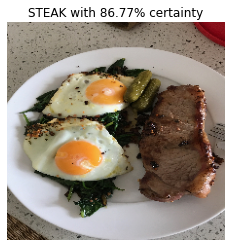

In [108]:
# test the function
pred_and_plot(model_09, path)

In [109]:
path2 = 'https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg'


C:\Users\neema\AppData\Local\Temp/ipykernel_7680/3226015744.py:8: MatplotlibDeprecationWarning: Directly reading images from URLs is deprecated since 3.4 and will no longer be supported two minor releases later. Please open the URL for reading and pass the result to Pillow, e.g. with ``np.array(PIL.Image.open(urllib.request.urlopen(url)))``.
  img = mpimg.imread(filename, format="jpeg")


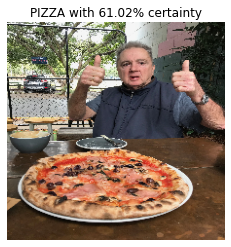

In [110]:
pred_and_plot(model_09, filename=path2)